# Modelling

In [2]:
#conda activate tfm-electricity-prices-env
#python -m ipykernel install --user --name tfm-electricity-prices-env

In [3]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import joblib
from joblib import dump, load
from pandas.plotting import register_matplotlib_converters

In [4]:
electricity_brent_weather = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/electricity_brent_weather.csv",
                                       header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "utf-8")
electricity_brent_weather

,Date,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
0,2013-05-07,711755.1,45.17,-0.3,2.29,0.59,5.2,52.95,0.0,Martes,104.4,105.4,105.94,104.0,24.372623,13.598554,19.108723,17.46993,0.54821163
1,2013-05-08,706886.06,50.05,-0.48,3.03,1.13,5.23,58.96,0.0,Miércoles,104.34,104.11,104.8,103.53,24.171618,13.924416,19.068588,16.027378,0.33500755
2,2013-05-09,712014.94,51.04,-0.41,1.34,0.76,5.2,57.94,0.0,Jueves,104.47,104.44,104.6,103.45,23.007523,13.323574,18.14288,17.443392,2.0035484
3,2013-05-10,707860.44,46.06,-0.18,1.35,1.23,5.18,53.64,0.0,Viernes,103.91,104.35,104.45,101.56,22.321642,12.264773,17.353886,17.460852,0.044820618
4,2013-05-11,623204.7,46.15,-0.29,2.4,1.23,4.11,53.6,0.0,Sábado,103.91,104.35,104.45,101.56,21.945469,10.597996,16.243876,17.480986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,2020-12-27,717809.2,26.71,0.0,2.04,0.35,1.87,30.97,0.0,Domingo,51.29,51.11,51.77,50.62,10.587904,-1.1632723,4.778873,25.961397,1.844361
2781,2020-12-28,801817.56,20.89,0.0,1.6,0.48,2.96,25.93,0.0,Lunes,50.86,51.25,52.02,50.53,10.993735,3.7412465,7.267571,33.766693,3.8239958
2782,2020-12-29,792248.94,39.49,0.03,2.04,0.27,3.02,44.85,0.0,Martes,51.09,51.02,51.63,50.86,10.021859,2.483079,6.3478003,23.367199,2.5908017
2783,2020-12-30,784823.4,49.69,0.02,2.52,0.34,3.07,55.63,0.0,Miércoles,51.34,51.32,51.56,51.04,9.730524,1.1381758,5.413928,18.685682,1.6149621


In [5]:
electricity_brent_weather.set_index("Date", inplace=True)

In [6]:
#Let's converts each column to the correct data type

electricity_brent_weather['Energía final MWh'] = pd.to_numeric(electricity_brent_weather['Energía final MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado diario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado diario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado intradiario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado intradiario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Restricciones €/MWh'] = pd.to_numeric(electricity_brent_weather['Restricciones €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Procesos OS €/MWh'] = pd.to_numeric(electricity_brent_weather['Procesos OS €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'] = pd.to_numeric(electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh'] = pd.to_numeric(electricity_brent_weather['Total €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Coste s.interrrumpibilidad'] = pd.to_numeric(electricity_brent_weather['Coste s.interrrumpibilidad'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio cierre Brent'] = pd.to_numeric(electricity_brent_weather['Precio cierre Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio apertura Brent'] = pd.to_numeric(electricity_brent_weather['Precio apertura Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio Máximo Brent'] = pd.to_numeric(electricity_brent_weather['Precio Máximo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio mínimo Brent'] = pd.to_numeric(electricity_brent_weather['Precio mínimo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather["Tmax"] = pd.to_numeric(electricity_brent_weather["Tmax"], downcast="float")
electricity_brent_weather["Tmin"] = pd.to_numeric(electricity_brent_weather["Tmin"], downcast="float")
electricity_brent_weather["Tmed"] = pd.to_numeric(electricity_brent_weather["Tmed"], downcast="float")
electricity_brent_weather["Vmax"] = pd.to_numeric(electricity_brent_weather["Vmax"], downcast="float")
electricity_brent_weather["TPrec"] = pd.to_numeric(electricity_brent_weather["TPrec"], downcast="float")

In [7]:
electricity_brent_weather

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,
2013-05-07,711755.1250,45.169998,-0.30,2.29,0.59,5.20,52.950001,0.0,Martes,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,706886.0625,50.049999,-0.48,3.03,1.13,5.23,58.959999,0.0,Miércoles,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,712014.9375,51.040001,-0.41,1.34,0.76,5.20,57.939999,0.0,Jueves,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,707860.4375,46.060001,-0.18,1.35,1.23,5.18,53.639999,0.0,Viernes,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,623204.6875,46.150002,-0.29,2.40,1.23,4.11,53.599998,0.0,Sábado,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,717809.1875,26.709999,0.00,2.04,0.35,1.87,30.969999,0.0,Domingo,51.290001,51.110001,51.770000,50.619999,10.587904,-1.163272,4.778873,25.961397,1.844361
2020-12-28,801817.5625,20.889999,0.00,1.60,0.48,2.96,25.930000,0.0,Lunes,50.860001,51.250000,52.020000,50.529999,10.993735,3.741246,7.267571,33.766693,3.823996
2020-12-29,792248.9375,39.490002,0.03,2.04,0.27,3.02,44.849998,0.0,Martes,51.090000,51.020000,51.630001,50.860001,10.021859,2.483079,6.347800,23.367199,2.590802


In [8]:
#Also and most importantly, the Date index

electricity_brent_weather.index = pd.DatetimeIndex(electricity_brent_weather.index, dayfirst= True)


In [9]:
electricity_brent_weather.index.dtype

dtype('<M8[ns]')

In [10]:
electricity_brent_weather.dtypes

Energía final MWh                          float32
Mercado diario €/MWh                       float32
Mercado intradiario €/MWh                  float32
Restricciones €/MWh                        float32
Procesos OS €/MWh                          float32
Garantía potencia Pagos capacidad €/MWh    float32
Total €/MWh                                float32
Coste s.interrrumpibilidad                 float32
Day                                         object
Precio cierre Brent                        float32
Precio apertura Brent                      float32
Precio Máximo Brent                        float32
Precio mínimo Brent                        float32
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

### ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend). 

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [11]:
#I'm going to create a DataFrame with only the variables that I'll use in the models

models_dataset = electricity_brent_weather.drop(["Day", "Coste s.interrrumpibilidad", "Mercado diario €/MWh",
                                  "Mercado intradiario €/MWh", "Restricciones €/MWh",
                                  "Procesos OS €/MWh", "Garantía potencia Pagos capacidad €/MWh", 
                                                 "Energía final MWh"], axis = 1)

In [12]:
models_dataset

,Total €/MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,
2013-05-07,52.950001,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,58.959999,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,57.939999,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,53.639999,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,53.599998,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,30.969999,51.290001,51.110001,51.770000,50.619999,10.587904,-1.163272,4.778873,25.961397,1.844361
2020-12-28,25.930000,50.860001,51.250000,52.020000,50.529999,10.993735,3.741246,7.267571,33.766693,3.823996
2020-12-29,44.849998,51.090000,51.020000,51.630001,50.860001,10.021859,2.483079,6.347800,23.367199,2.590802


In [13]:
#Let's have a look at the autocorrelation of a few variables
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

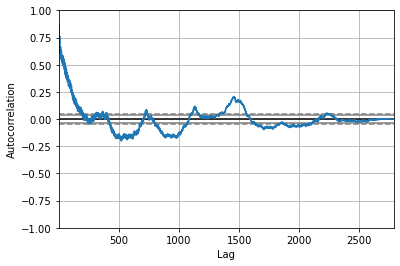

In [14]:
#There is a positive correlation aproximately in the first 250-300 lags.
#After that is almost always negative until ~1.100 lags and it gets negative/around 0 from ~ 1.600 lags
autocorrelation_plot(electricity_brent_weather["Total €/MWh"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

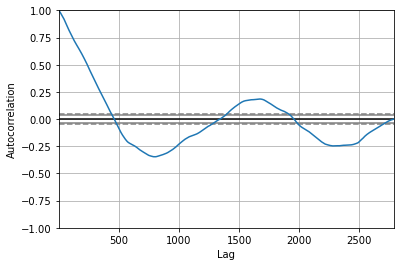

In [15]:
autocorrelation_plot(electricity_brent_weather["Precio cierre Brent"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

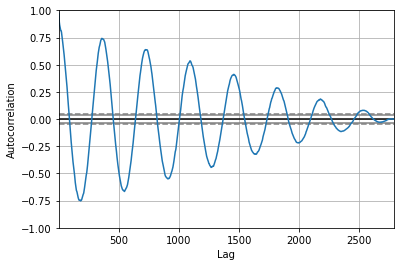

In [16]:
autocorrelation_plot(electricity_brent_weather["Tmax"])

I'm going to start with an ARIMA model, using walk-forward validation but not really estimating or accurately choosing any of the parameters of the model. This will work as a MVP.

Walk Forward Analysis does optimization on a training set; test on a period after the set and then rolls it all forward and repeats the process. We have multiple out-of-sample periods and look at these results combined.

After that, I'll check the model and will start modifying it until I think is optimal.

I think the most important thing to notice here is that ARIMA works for univariate time series, so I will only use the electricity price to predict itself.

Also, ARIMA does not work well with seasonal data, so let's firstly check if the electricity prices are stationay or not. I will use a Dickey-Fuller test to do that.

### Checking Stationary in the time series - Dickey-Fuller test

As previously did, let's check again if the electricity prices follow a normal distribution:

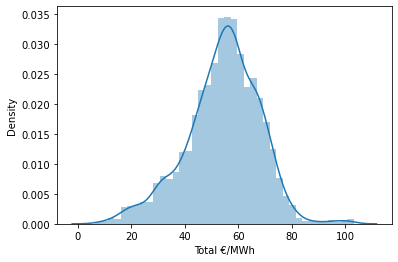

In [17]:
sns.distplot(models_dataset["Total €/MWh"]);

It looks like they do follow a normal distribution, maybe with a longer right tail. Therefore, I think it is safe to assume that the electricity prices follow a Gaussian distribution. 

This is good, as I'll be digging into the mean and variance and I can assume an equal number of measurements will be above and below the mean value.

However, the Dickey-Fuller test is used in univariate time series, and mine is not. I will use it to check only the electricity prices.

In [18]:
electricity_price = pd.DataFrame(models_dataset["Total €/MWh"])

In [19]:
electricity_price

,Total €/MWh
Date,
2013-05-07,52.950001
2013-05-08,58.959999
2013-05-09,57.939999
2013-05-10,53.639999
2013-05-11,53.599998
...,...
2020-12-27,30.969999
2020-12-28,25.930000
2020-12-29,44.849998


In [20]:
from statsmodels.tsa.stattools import adfuller

y = electricity_price.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Dickey-Fuller Statistic: -3.780973
p-value: 0.003108
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Looking at the ADF Statistic, it is likely to reject the null hypothesis and that means the electricity prices are stationary and do not depend on time.

In this case, the null hypothesis can be rejected with a significance level of less than 1% (the Dickey-Fuller statistic is lower than the critical value at 1% treeshold). 

That means, I can use an ARIMA model to forecast the electricity prices.

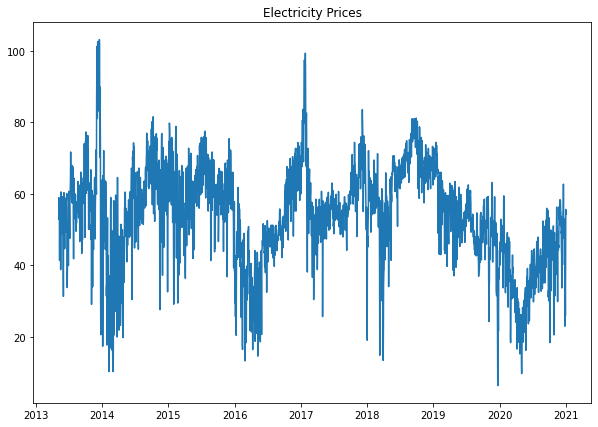

In [21]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(electricity_price.index, electricity_price.values);
plt.title('Electricity Prices');

Let's now see if the Brent oil crude futures prices are stationary or not, just to get more information on my dataset.

In [22]:
brent_prices = models_dataset["Precio cierre Brent"]

Dickey-Fuller Statistic: -1.711204
p-value: 0.425350
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


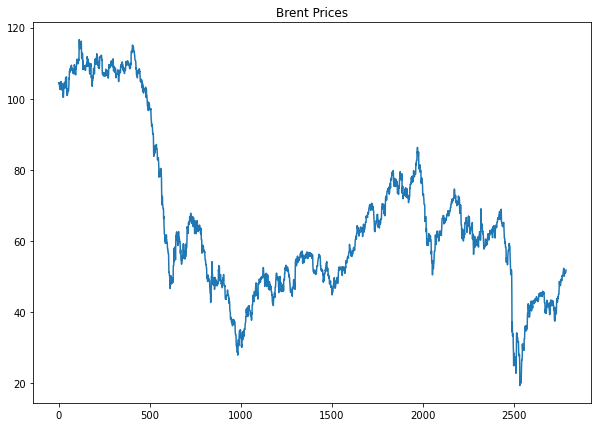

In [23]:
y = brent_prices.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(y);
plt.title('Brent Prices');

In this case, the null hypothesis cannot be rejected and therefore, the Brent prices are not stationary. That means, they are influenced by the time.

In [24]:
%%time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
print('Test RMSE: %.3f' % rmse)



predicted=79.325654, expected=80.559998
predicted=78.392621, expected=79.330002
predicted=78.244281, expected=75.459999
predicted=76.709615, expected=76.019997
predicted=77.989702, expected=78.000000
predicted=77.735804, expected=80.360001
predicted=80.867490, expected=81.080002
predicted=80.049376, expected=79.750000
predicted=79.018161, expected=78.980003
predicted=77.690544, expected=77.309998
predicted=77.599728, expected=75.160004
predicted=76.606013, expected=73.019997
predicted=75.693371, expected=75.059998
predicted=76.963110, expected=76.889999
predicted=76.936433, expected=78.930000
predicted=78.242853, expected=81.230003
predicted=79.345029, expected=74.800003
predicted=73.818372, expected=74.110001
predicted=74.749938, expected=71.150002
predicted=73.089368, expected=72.459999
predicted=74.397406, expected=77.139999
predicted=78.005440, expected=80.370003
predicted=79.548705, expected=77.910004
predicted=74.967696, expected=73.019997
predicted=73.597874, expected=61.570000


predicted=56.430432, expected=49.450001
predicted=51.961514, expected=52.490002
predicted=57.773943, expected=58.570000
predicted=58.409919, expected=55.910000
predicted=54.275145, expected=56.400002
predicted=57.402902, expected=60.320000
predicted=58.515609, expected=62.369999
predicted=57.306048, expected=61.410000
predicted=60.006256, expected=58.029999
predicted=59.042792, expected=61.599998
predicted=60.358186, expected=61.779999
predicted=60.631395, expected=52.139999
predicted=54.739911, expected=59.910000
predicted=62.555797, expected=44.439999
predicted=47.126986, expected=38.580002
predicted=45.303241, expected=46.639999
predicted=52.851643, expected=60.959999
predicted=58.718939, expected=55.570000
predicted=50.372633, expected=46.209999
predicted=50.596709, expected=37.070000
predicted=37.016692, expected=54.880001
predicted=53.106882, expected=60.250000
predicted=56.457339, expected=57.810001
predicted=58.530061, expected=62.889999
predicted=59.544555, expected=63.470001


predicted=55.609073, expected=59.049999
predicted=56.435669, expected=59.299999
predicted=55.553641, expected=57.209999
predicted=55.292043, expected=54.410000
predicted=55.192436, expected=36.570000
predicted=39.753732, expected=32.650002
predicted=41.415840, expected=24.270000
predicted=35.508467, expected=34.419998
predicted=41.376409, expected=34.590000
predicted=37.896030, expected=44.570000
predicted=44.415860, expected=43.590000
predicted=36.476543, expected=42.060001
predicted=38.648087, expected=44.840000
predicted=39.359354, expected=41.720001
predicted=41.732084, expected=49.869999
predicted=46.943710, expected=53.189999
predicted=51.949553, expected=53.070000
predicted=49.138049, expected=50.369999
predicted=48.569229, expected=53.509998
predicted=52.346414, expected=50.480000
predicted=47.831448, expected=48.070000
predicted=50.892005, expected=55.020000
predicted=55.526601, expected=62.810001
predicted=59.111204, expected=63.169998
predicted=58.149055, expected=60.970001


predicted=22.812854, expected=16.219999
predicted=23.495277, expected=28.350000
predicted=30.558103, expected=26.770000
predicted=26.179457, expected=29.510000
predicted=30.294113, expected=33.360001
predicted=32.507234, expected=36.720001
predicted=30.010961, expected=33.700001
predicted=29.033976, expected=34.840000
predicted=36.150792, expected=38.790001
predicted=35.304195, expected=39.139999
predicted=37.289118, expected=36.430000
predicted=36.233559, expected=28.639999
predicted=31.308086, expected=32.380001
predicted=33.606518, expected=32.070000
predicted=32.951005, expected=23.620001
predicted=27.505217, expected=31.799999
predicted=34.916032, expected=34.200001
predicted=32.521891, expected=35.630001
predicted=31.998002, expected=28.080000
predicted=29.822100, expected=24.450001
predicted=26.573881, expected=25.049999
predicted=24.783866, expected=30.139999
predicted=32.579712, expected=36.520000
predicted=35.078072, expected=36.360001
predicted=34.729912, expected=39.180000


predicted=57.196502, expected=55.619999
predicted=51.001107, expected=62.730000
predicted=57.705993, expected=54.470001
predicted=49.459857, expected=49.459999
predicted=51.825287, expected=47.570000
predicted=50.992672, expected=52.970001
predicted=54.253833, expected=52.560001
predicted=53.044147, expected=52.509998
predicted=55.503290, expected=46.209999
predicted=45.895640, expected=22.959999
predicted=29.274597, expected=38.830002
predicted=45.499783, expected=30.969999
predicted=35.294682, expected=25.930000
predicted=32.109308, expected=44.849998
predicted=48.080637, expected=55.630001
predicted=47.151925, expected=54.349998
Test RMSE: 4.920
CPU times: user 7min 21s, sys: 1min 43s, total: 9min 5s
Wall time: 6min 54s


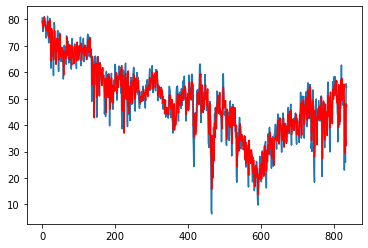

In [25]:
#plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Looking at the plot above, it looks like the model is working quite well. This is also supported by a RMSE of 4.920, which means the predictions can vary in less than 5 euros from reality. Looking at the distribution of residuals below, I can see they're around 0, and the mean of residuals is almost 0. 

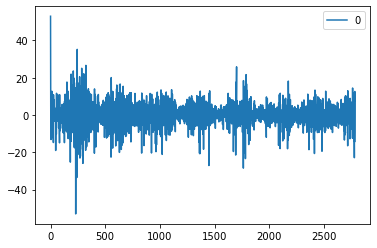

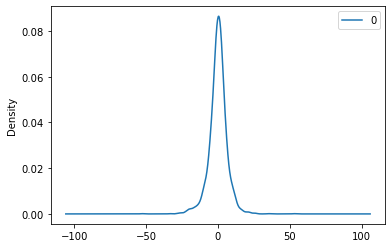

                 0
count  2784.000000
mean      0.008472
std       6.249902
min     -53.048016
25%      -2.958618
50%       0.280196
75%       3.188891
max      52.950001


In [26]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

In [27]:
from statsmodels.tsa.arima_model import ARIMAResults

#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("ARIMA.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("ARIMA.pkl")

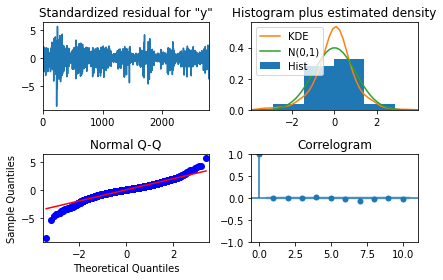

In [28]:
loaded_ARIMA.plot_diagnostics();
plt.tight_layout()

In [29]:
loaded_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2784
Model:                ARIMA(10, 1, 0)   Log Likelihood               -9012.588
Date:                Sun, 07 Nov 2021   AIC                          18047.176
Time:                        16:20:47   BIC                          18112.420
Sample:                             0   HQIC                         18070.734
                               - 2784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2231      0.013    -17.736      0.000      -0.248      -0.198
ar.L2         -0.4109      0.014    -28.917      0.000      -0.439      -0.383
ar.L3         -0.2761      0.014    -19.049      0.000      -0.305      -0.248
ar.L4         -0.2196      0.016    -13.925      0.000      -0.250      -0.189
ar.L5         -0.2423      0.016    -15.345      0.000      -0.273      -0.211
ar.L6         -0.1602      0.015    -10.510      0.000      -0.190      -0.130
ar.L7          0.1974      0.016     12.513      0.000       0.166       0.228
ar.L8         -0.0442      0.016     -2.762      0.006      -0.076      -0.013
ar.L9          0.0197      0.015      1.320      0.187      -0.010       0.049
ar.L10        -0.0088      0.014     -0.609      0.543      -0.037       0.019
sigma2        38.0338      0.605     62.860      0.000      36.848      39.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2520.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2785
Training Observations: 1949
Testing Observations: 836


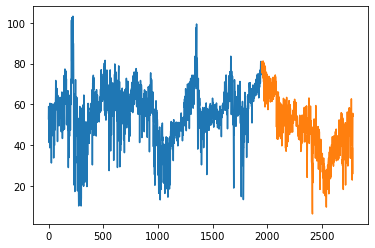

In [31]:
#This show us in a plot the 2785 observations divided by train (in blue, 1949) and test (in orange, 836)
pd.plotting.register_matplotlib_converters()
plt.plot(train)
plt.plot([None for i in train] + [y for y in test])
plt.show()

In [32]:
#import sys
#print(sys.executable)
#!conda info
#!conda list

The above ARIMA model works well, but I'm only using the past electricity prices to forecast.

Now, I'm going to use different models that take into account other variables of my dataset.

### Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

The ADF test enables one to test for cointegration between two-time series. The Johansen Test can be used to check for cointegration between a maximum of 12-time series.

In [33]:
#Checking stationarity using the Coint Johansen Test instead of ADF.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(models_dataset,0,1).eig

array([0.31340066, 0.28598031, 0.25484683, 0.24052541, 0.16428768,
       0.14862456, 0.11251546, 0.05532519, 0.01294861, 0.00105211])

In [34]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
cointegration_rank = select_coint_rank(models_dataset,0,1)
print(cointegration_rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0  10          5045.          239.2
  1  10          3999.          197.4
  2  10          3061.          159.5
  3  10          2243.          125.6
  4  10          1477.          95.75
  5  10          977.6          69.82
  6  10          529.8          47.85
  7  10          197.6          29.80
  8  10          39.20          15.49
  9  10          2.930          3.841
-------------------------------------


The test statistics are higher than the critical values for all variables(series), apart from one. This means the null hypotesis can be rejected at a 95% confidence level, apart from one variable.

The null hypotesis was that the variables are not cointegrated, so rejecting the null hypotesis means that the variables (series) are cointegrated.

No handles with labels found to put in legend.


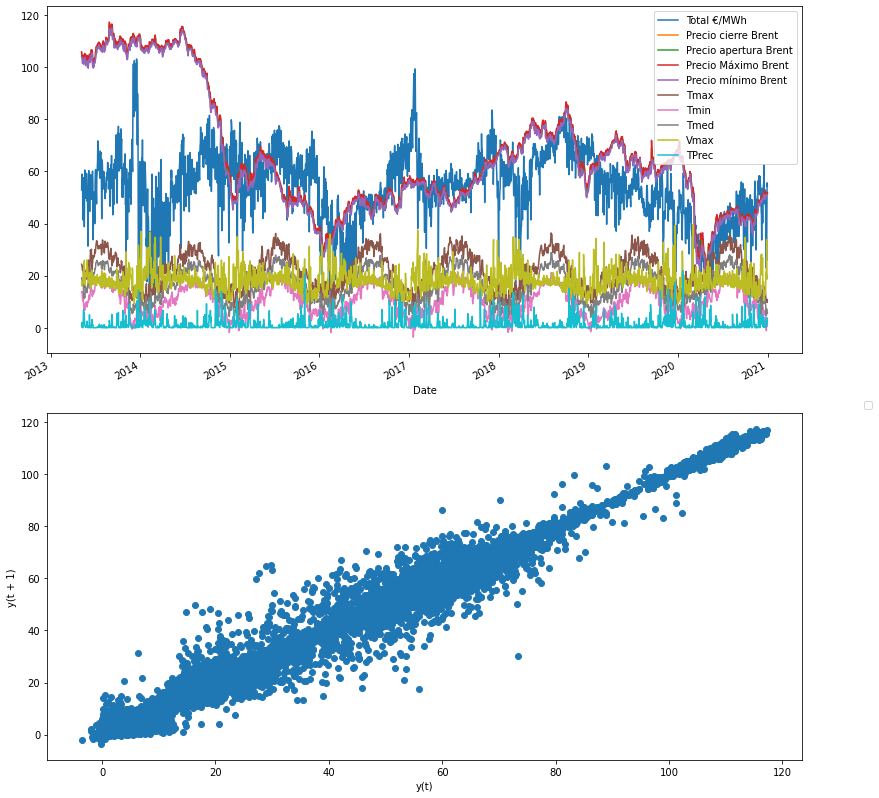

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,11))

#series plot
models_dataset.plot(ax=ax1) 

plt.legend(bbox_to_anchor=(1.1, 1.05), loc="upper right")

plt.tight_layout()

#lag plot
pd.plotting.lag_plot(models_dataset)
plt.show()

The plot above shows some relationships among the series,showing also some outliers.

The linear shape of the lag plot indicates the presence of positive auto-correlation. 

In [36]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
models_dataset.index = pd.DatetimeIndex(models_dataset.index, dayfirst= True).to_period("D")

In [37]:
#creating the train and validation set

train = models_dataset[:int(0.7*(len(models_dataset)))]
test = models_dataset[int(0.7*(len(models_dataset))):]

#fitting the model

from statsmodels.tsa.vector_ar.var_model import VAR

model_VAR = VAR(endog=train)
model_fit_VAR = model_VAR.fit()

#predictions on validation

prediction_VAR = model_fit_VAR.forecast(model_fit_VAR.y, steps=len(test))
prediction_VAR

array([[76.80076561, 79.67056579, 79.62909216, ..., 23.07455918,
        15.87552821,  0.82032479],
       [73.5052225 , 79.62381497, 79.62776403, ..., 22.82273017,
        16.34811486,  0.86824371],
       [70.80541665, 79.58543761, 79.59307732, ..., 22.59418442,
        16.72920993,  0.88292891],
       ...,
       [56.4680601 , 66.7766858 , 66.77192284, ..., 16.1053856 ,
        18.2254981 ,  1.24840478],
       [56.46766125, 66.7674934 , 66.76273257, ..., 16.10509595,
        18.22541666,  1.24842821],
       [56.46726287, 66.75831157, 66.75355288, ..., 16.10480664,
        18.22533531,  1.24845162]])

The array above shows the predictions, where each list represents the predictions of each row.
Let's show this in a more understandable way:

In [38]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

pred = pd.DataFrame(index= test.index,columns=cols)

for j in range(0,10):
    for i in range(0, len(prediction_VAR)):
       pred.iloc[i][j] = prediction_VAR[i][j]

pred

,Total €/MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,
2018-09-13,76.8008,79.6706,79.6291,80.324,78.8426,28.7918,17.1459,23.0746,15.8755,0.820325
2018-09-14,73.5052,79.6238,79.6278,80.3487,78.8103,28.6292,16.8408,22.8227,16.3481,0.868244
2018-09-15,70.8054,79.5854,79.5931,80.3326,78.7637,28.4491,16.5727,22.5942,16.7292,0.882929
2018-09-16,68.5795,79.5512,79.5564,80.3064,78.7213,28.2677,16.334,22.3829,17.0292,0.883085
2018-09-17,66.7411,79.5196,79.5221,80.2777,78.6843,28.0905,16.1182,22.1859,17.2641,0.879053
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,56.4689,66.7951,66.7903,67.5828,65.9451,21.6835,10.404,16.106,18.2257,1.24836
2020-12-28,56.4685,66.7859,66.7811,67.5736,65.9359,21.6832,10.4037,16.1057,18.2256,1.24838
2020-12-29,56.4681,66.7767,66.7719,67.5644,65.9267,21.6829,10.4034,16.1054,18.2255,1.2484


In [39]:
pred.dtypes

Total €/MWh              object
Precio cierre Brent      object
Precio apertura Brent    object
Precio Máximo Brent      object
Precio mínimo Brent      object
Tmax                     object
Tmin                     object
Tmed                     object
Vmax                     object
TPrec                    object
dtype: object

In [40]:
type(pred)

pandas.core.frame.DataFrame

In [41]:
#Let's converts each column to the correct data type

pred['Total €/MWh'] = pred[['Total €/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio cierre Brent'] = pred[['Precio cierre Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio apertura Brent'] = pred[['Precio apertura Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio Máximo Brent'] = pred[['Precio Máximo Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio mínimo Brent'] = pred[['Precio mínimo Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmax"] = pred[["Tmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmin"] = pred[["Tmin"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmed"] = pred[["Tmed"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Vmax"] = pred[["Vmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["TPrec"] = pred[["TPrec"]].apply(pd.to_numeric, downcast="float", errors= "coerce")

In [42]:
pred.dtypes

Total €/MWh              float32
Precio cierre Brent      float32
Precio apertura Brent    float32
Precio Máximo Brent      float32
Precio mínimo Brent      float32
Tmax                     float32
Tmin                     float32
Tmed                     float32
Vmax                     float32
TPrec                    float32
dtype: object

In [43]:
#Checking the Root Mean Square Error

for i in cols:
    print('RMSE for', i, 'is : ', sqrt(mean_squared_error(pred[i], test[i])))

RMSE for Total €/MWh is :  15.528328879912815
RMSE for Precio cierre Brent is :  19.856329827753054
RMSE for Precio apertura Brent is :  19.780138415400987
RMSE for Precio Máximo Brent is :  19.617003931837267
RMSE for Precio mínimo Brent is :  19.961877729812894
RMSE for Tmax is :  6.822242699646566
RMSE for Tmin is :  5.428091745049616
RMSE for Tmed is :  6.020553670369756
RMSE for Vmax is :  4.277414204613814
RMSE for TPrec is :  2.52024142879924


In [44]:
#I'm going to save this model so I can load it at any other poin on time if needed

dump(model_fit_VAR, open("model_VAR.pkl", "wb"))

#To load the model, I would need to use the following code:

VAR_loaded = load(open("model_VAR.pkl", "rb"))

In [45]:
VAR_loaded.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Nov, 2021
Time:                     16:20:48
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -2.33708
Nobs:                     1948.00    HQIC:                  -2.53613
Log likelihood:          -24948.0    FPE:                  0.0705195
AIC:                     -2.65187    Det(Omega_mle):       0.0666583
--------------------------------------------------------------------
Results for equation Total €/MWh
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            8.566371         2.115515            4.049           0.000
L1.Total €/MWh                   0.831269         0.015752           52.772           0.000
L1.Precio 

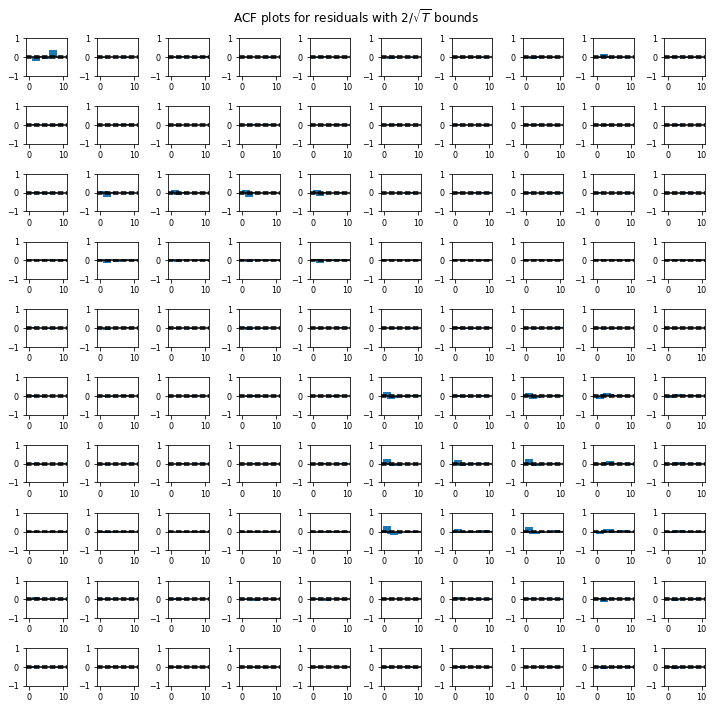

In [46]:
VAR_loaded.plot_acorr();
plt.tight_layout()

In [47]:
#This is the Final Prediction Error

VAR_loaded.fpe

0.07051950543624501

In [48]:
VAR_loaded.stderr

,Total €/MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
const,2.115515,0.275931,0.153942,0.195964,0.204877,0.438200,0.333951,0.320883,0.835645,0.512059
L1.Total €/MWh,0.015752,0.002055,0.001146,0.001459,0.001526,0.003263,0.002487,0.002389,0.006222,0.003813
L1.Precio cierre Brent,0.412784,0.053840,0.030038,0.038237,0.039976,0.085503,0.065161,0.062611,0.163053,0.099914
L1.Precio apertura Brent,0.401592,0.052381,0.029223,0.037200,0.038892,0.083184,0.063394,0.060914,0.158632,0.097205
L1.Precio Máximo Brent,0.445534,0.058112,0.032421,0.041271,0.043148,0.092286,0.070331,0.067579,0.175989,0.107841
L1.Precio mínimo Brent,0.438098,0.057142,0.031880,0.040582,0.042427,0.090746,0.069157,0.066451,0.173052,0.106041
L1.Tmax,0.960178,0.125238,0.069870,0.088943,0.092988,0.198888,0.151572,0.145640,0.379278,0.232410
L1.Tmin,0.965334,0.125911,0.070246,0.089421,0.093488,0.199956,0.152386,0.146423,0.381315,0.233659
L1.Tmed,1.909355,0.249041,0.138940,0.176867,0.184911,0.395497,0.301407,0.289612,0.754211,0.462158
L1.Vmax,0.057581,0.007510,0.004190,0.005334,0.005576,0.011927,0.009090,0.008734,0.022745,0.013937


In [64]:
#predictions for 2 day ahead

model_VAR = VAR(endog=models_dataset)
model_fit_VAR = model_VAR.fit()
yhat = model_fit_VAR.forecast(model_fit_VAR.y, steps=2)
print(yhat)

[[54.06345863 51.7772597  51.6991615  52.31374546 51.01215617 10.73309514
   0.84858907  5.82906151 19.46717326  2.19043931]
 [53.90858116 51.7801379  51.75986172 52.50903158 50.98942006 10.88616732
   1.10152122  6.02500109 19.06096946  2.14352579]]


In [65]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

index = pd.date_range("2021-01-01", periods = 2, freq = "D")

forecast_VAR = pd.DataFrame(index= index,columns=cols)

for j in range(0,10):
    for i in range(0, len(yhat)):
       forecast_VAR.iloc[i][j] = yhat[i][j]

forecast_VAR

,Total €/MWh,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
2021-01-01,54.0635,51.7773,51.6992,52.3137,51.0122,10.7331,0.848589,5.82906,19.4672,2.19044
2021-01-02,53.9086,51.7801,51.7599,52.509,50.9894,10.8862,1.10152,6.025,19.061,2.14353


Let's now compare this forecast with that it actually happened in the first 2 days of January of 2021:

In [67]:
electricity_prices_jan_2021 = pd.read_excel("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2021/PFMDIASM_TOD_202101.1/PFMDIASM_TOD_20210101_20210131.xls",
                                            dtype= str,parse_dates= True, engine= None, header = 3, usecols= ["Periodo","Total\n€/MWh"])
electricity_prices_jan_2021.head(2)

,Periodo,Total\n€/MWh
0,01/01/21 Viernes,47.85
1,02/01/21 Sábado,53.65


In [74]:
historical_brent = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/historic_brent_prices.csv", dtype= str, sep= ";",
                               usecols= ["Date", "Último", "Apertura", "Máximo", "Mínimo"])

historical_brent["Date"] = pd.to_datetime(historical_brent["Date"], dayfirst=True)

In [75]:
days = pd.DataFrame(index = pd.date_range("2013-01-02", periods = 3118, freq = "D")).rename_axis("Date")

historical_brent_prices_allweek = pd.merge(days, historical_brent, on= "Date", indicator = True, how= "left")

#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
historical_brent_prices_allweek = historical_brent_prices_allweek.fillna(method= "ffill")
historical_brent_prices_allweek.set_index("Date", inplace= True)

In [76]:
historical_brent_prices_allweek.loc["2021-01-01":"2021-01-02"]

,Último,Apertura,Máximo,Mínimo,_merge
Date,,,,,
2021-01-01,"51,80","51,49","51,84","50,90",left_only
2021-01-02,"51,80","51,49","51,84","50,90",left_only


I think the model is working quiet well with short-term predictions